In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [6]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [7]:
conv = nn.Conv2d(3, 16, kernel_size=3) # <1>
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [8]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [9]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

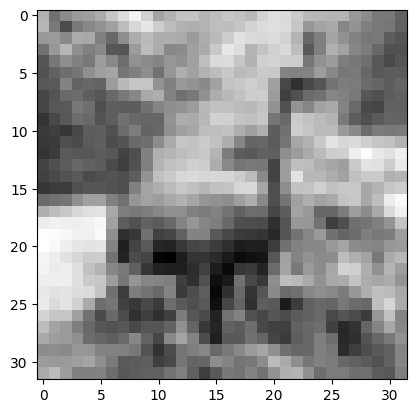

In [10]:
plt.imshow(img.mean(0), cmap='gray')
plt.show()

In [11]:
output.shape

torch.Size([1, 16, 30, 30])

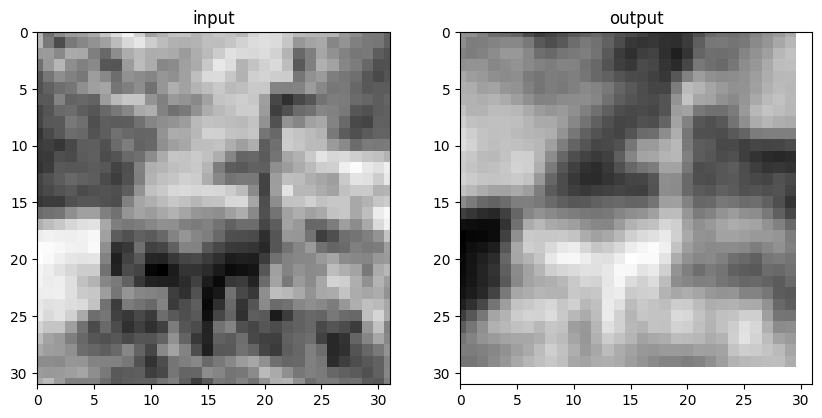

In [12]:
# bookskip
def plot_images(input, output, img_name=""):
    # Create a figure with two subplots
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.8))

    # Left subplot (input)
    ax1.imshow(input.mean(0), cmap='gray')
    ax1.set_title('input')
    ax1.set_xlim([0, 31])  # Set x-axis limits
    ax1.set_ylim([31, 0])  # Invert the y-axis

    # Right subplot (output)
    ax2.imshow(output[0, 0].detach(), cmap='gray')
    ax2.set_title('output')
    ax2.set_xlim([0, 31])  # Set x-axis limits
    ax2.set_ylim([31, 0])  # Invert the y-axis

    if img_name:
        plt.savefig(img_name)  # bookskip
    plt.show()

plot_images(img, output, 'Ch8_F2_PyTorch.png')

In [13]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1) # <1>
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [14]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

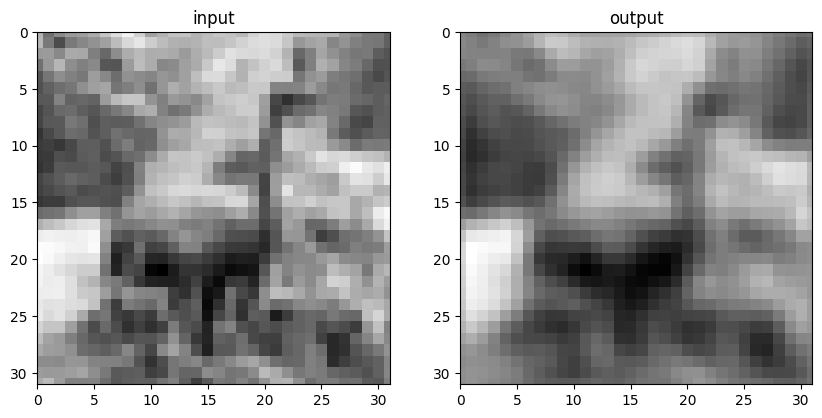

In [15]:
output = conv(img.unsqueeze(0))
plot_images(img, output, 'Ch8_F4_PyTorch.png')

In [16]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

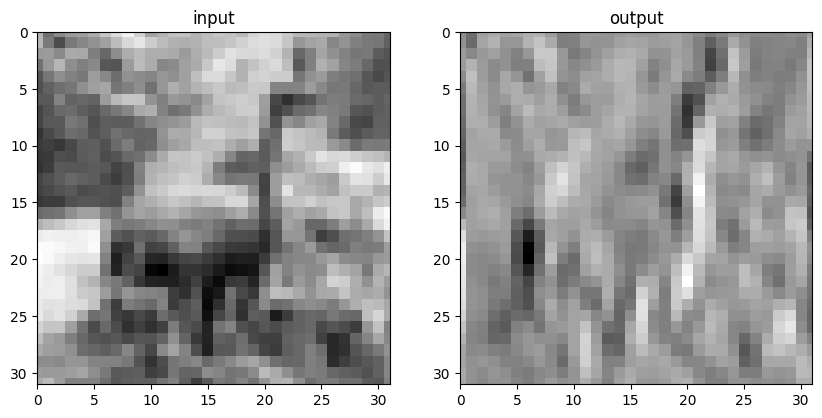

In [17]:
output = conv(img.unsqueeze(0))
plot_images(img, output, 'Ch8_F5_PyTorch.png')

In [18]:
conv_edge = nn.Conv2d(3, 1, kernel_size=3, padding=1)
conv_horizontal = nn.Conv2d(3, 1, kernel_size=3, padding=1)
conv_vertical = nn.Conv2d(3, 1, kernel_size=3, padding=1)
conv_blur = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv_edge.weight[:] = torch.tensor([[-1.0, -1.0, -1.0],
                                        [-1.0, 8.0, -1.0],
                                        [-1.0, -1.0, -1.0]])
    conv_edge.bias.zero_()
    conv_horizontal.weight[:] = torch.tensor([[1.0, 1.0, 1.0],
                                              [0.0, 0.0, 0.0],
                                              [-1.0, -1.0, -1.0]])
    conv_horizontal.bias.zero_()
    conv_vertical.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                            [-1.0, 0.0, 1.0],
                                            [-1.0, 0.0, 1.0]])
    conv_vertical.bias.zero_()
    conv_blur.weight[:] = torch.tensor([[1.0, 2.0, 1.0],
                                        [2.0, 4.0, 2.0],
                                        [1.0, 2.0, 1.0]]) / 16.0
    conv_blur.bias.zero_()

In [19]:
def plot_images(input, outputs, titles, img_name=""):
    # Create a figure with multiple subplots
    fig, axs = plt.subplots(1, len(outputs) + 1, figsize=(10, 4.8))
    # First subplot (input)
    axs[0].imshow(input.mean(0), cmap='gray')
    axs[0].set_title('input')
    axs[0].set_xlim([0, 31])  # Set x-axis limits
    axs[0].set_ylim([31, 0])  # Invert the y-axis
    # Other subplots (outputs)
    for i, (output, title) in enumerate(zip(outputs, titles), start=1):
        axs[i].imshow(output[0, 0].detach(), cmap='gray')
        axs[i].set_title(title)
        axs[i].set_xlim([0, 31])  # Set x-axis limits
        axs[i].set_ylim([31, 0])  # Invert the y-axis
    if img_name:
        plt.savefig(img_name)  # bookskip
    plt.tight_layout()
    plt.show()

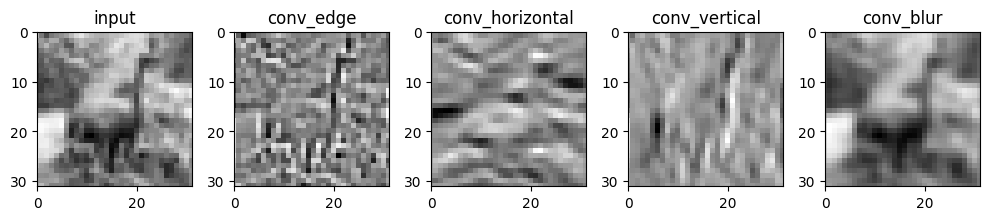

In [20]:
output1 = conv_edge(img.unsqueeze(0))
output2 = conv_horizontal(img.unsqueeze(0))
output3 = conv_vertical(img.unsqueeze(0))
output4 = conv_blur(img.unsqueeze(0))
plot_images(img, [output1, output2, output3, output4], ['conv_edge', 'conv_horizontal', 'conv_vertical', 'conv_blur'], 'Ch8_F2_PyTorch.png')

In [21]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [22]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ...
            )

In [23]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ... <1>
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [24]:
for name, param in model.named_parameters():
    print(f"Layer: {name}, Parameters: {param.numel()}")

Layer: 0.weight, Parameters: 432
Layer: 0.bias, Parameters: 16
Layer: 3.weight, Parameters: 1152
Layer: 3.bias, Parameters: 8
Layer: 6.weight, Parameters: 16384
Layer: 6.bias, Parameters: 32
Layer: 8.weight, Parameters: 64
Layer: 8.bias, Parameters: 2


In [25]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [26]:
model(img.unsqueeze(0))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x8 and 512x32)

In [27]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8) # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [28]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [29]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [30]:
model = Net()
model(img.unsqueeze(0))

tensor([[ 0.0190, -0.0683]], grad_fn=<AddmmBackward0>)

In [31]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

In [32]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2023-12-17 13:06:50.694648 Epoch 1, Training loss 0.5532726212671608
2023-12-17 13:07:14.771654 Epoch 10, Training loss 0.3326261207746093
2023-12-17 13:07:39.020945 Epoch 20, Training loss 0.28345089514923705
2023-12-17 13:08:06.334942 Epoch 30, Training loss 0.2597086149131417
2023-12-17 13:08:37.686469 Epoch 40, Training loss 0.23957111145470553
2023-12-17 13:09:08.932993 Epoch 50, Training loss 0.2203540600788821
2023-12-17 13:09:40.949549 Epoch 60, Training loss 0.20444304040472977
2023-12-17 13:10:13.655975 Epoch 70, Training loss 0.19050896988742672
2023-12-17 13:10:48.164396 Epoch 80, Training loss 0.17518811478356647
2023-12-17 13:11:21.939351 Epoch 90, Training loss 0.1602808669399304
2023-12-17 13:11:53.375763 Epoch 100, Training loss 0.1471608299406091


In [33]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.95
Accuracy val: 0.90


In [34]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [35]:
loaded_model = Net()  # <1>
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

In [36]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cuda.


In [37]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  # <1>
            labels = labels.to(device=device) # <1>
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [38]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = Net().to(device=device)  # <1>
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2023-12-17 13:12:00.565946 Epoch 1, Training loss 0.5915916484252662
2023-12-17 13:12:05.740138 Epoch 10, Training loss 0.3283297116779218
2023-12-17 13:12:12.016900 Epoch 20, Training loss 0.2893955722735946
2023-12-17 13:12:18.220646 Epoch 30, Training loss 0.2627578775404365
2023-12-17 13:12:24.763859 Epoch 40, Training loss 0.24144600507370226
2023-12-17 13:12:30.631232 Epoch 50, Training loss 0.22799589223922437
2023-12-17 13:12:36.845343 Epoch 60, Training loss 0.21151657132016624
2023-12-17 13:12:42.943180 Epoch 70, Training loss 0.1986813422316199
2023-12-17 13:12:49.772488 Epoch 80, Training loss 0.1869773561977277
2023-12-17 13:12:56.838137 Epoch 90, Training loss 0.17534022075924904
2023-12-17 13:13:03.608163 Epoch 100, Training loss 0.16270917594717565


In [39]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
all_acc_dict = collections.OrderedDict()

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        accdict[name] = correct / total
    return accdict

all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

Accuracy train: 0.93
Accuracy val: 0.89


In [40]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt',
                                        map_location=device))

<All keys matched successfully>

In [41]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [42]:
model = NetWidth().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

validate(model, train_loader, val_loader)

2023-12-17 13:13:05.066599 Epoch 1, Training loss 0.5357806853428009
2023-12-17 13:13:11.874554 Epoch 10, Training loss 0.31847289176123916
2023-12-17 13:13:19.783740 Epoch 20, Training loss 0.2778056184197687
2023-12-17 13:13:27.439905 Epoch 30, Training loss 0.24723546928281237
2023-12-17 13:13:35.165484 Epoch 40, Training loss 0.22258142111407722
2023-12-17 13:13:44.246216 Epoch 50, Training loss 0.19859287327831718
2023-12-17 13:13:52.075767 Epoch 60, Training loss 0.17566816074548253
2023-12-17 13:13:59.577327 Epoch 70, Training loss 0.15372949205101674
2023-12-17 13:14:07.154050 Epoch 80, Training loss 0.13252405777193937
2023-12-17 13:14:14.883474 Epoch 90, Training loss 0.11195208044473533
2023-12-17 13:14:23.231954 Epoch 100, Training loss 0.09287629893441109
Accuracy train: 0.96
Accuracy val: 0.90


{'train': 0.9611, 'val': 0.896}

In [43]:
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


In [44]:
model = NetWidth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2023-12-17 13:14:24.647813 Epoch 1, Training loss 0.5388931125212627
2023-12-17 13:14:33.162767 Epoch 10, Training loss 0.3167521409737836
2023-12-17 13:14:43.355814 Epoch 20, Training loss 0.27842187444875194
2023-12-17 13:14:53.688778 Epoch 30, Training loss 0.24605102647262014
2023-12-17 13:15:03.824457 Epoch 40, Training loss 0.21640677360972022
2023-12-17 13:15:14.437364 Epoch 50, Training loss 0.18980575500020555
2023-12-17 13:15:25.223192 Epoch 60, Training loss 0.16631890747957168
2023-12-17 13:15:35.649654 Epoch 70, Training loss 0.14455139311920306
2023-12-17 13:15:46.533938 Epoch 80, Training loss 0.12368319715094414
2023-12-17 13:15:57.514460 Epoch 90, Training loss 0.1041597502104416
2023-12-17 13:16:07.517283 Epoch 100, Training loss 0.08618363751110378
Accuracy train: 0.96
Accuracy val: 0.89


In [45]:
sum(p.numel() for p in model.parameters())

38386

In [46]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn,
                        train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum()
                          for p in model.parameters())  # <1>
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))


In [47]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2023-12-17 13:16:09.287261 Epoch 1, Training loss 0.5895649376948169
2023-12-17 13:16:20.103084 Epoch 10, Training loss 0.36712257307805835
2023-12-17 13:16:29.125773 Epoch 20, Training loss 0.32768052768935063
2023-12-17 13:16:38.626416 Epoch 30, Training loss 0.30692087123348455
2023-12-17 13:16:49.927444 Epoch 40, Training loss 0.2892146458861175
2023-12-17 13:17:01.046030 Epoch 50, Training loss 0.27280293775212233
2023-12-17 13:17:12.135434 Epoch 60, Training loss 0.2586521618305498
2023-12-17 13:17:22.067835 Epoch 70, Training loss 0.24554306088359493
2023-12-17 13:17:31.486903 Epoch 80, Training loss 0.2335439644706477
2023-12-17 13:17:40.510512 Epoch 90, Training loss 0.22252330611086196
2023-12-17 13:17:49.602456 Epoch 100, Training loss 0.21267037682092874
Accuracy train: 0.91
Accuracy val: 0.89


In [48]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [49]:
model = NetDropout(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2023-12-17 13:17:50.856867 Epoch 1, Training loss 0.567082162115984
2023-12-17 13:17:58.018249 Epoch 10, Training loss 0.3830935364695871
2023-12-17 13:18:05.741682 Epoch 20, Training loss 0.3489157675178188
2023-12-17 13:18:13.417031 Epoch 30, Training loss 0.33050682542810017
2023-12-17 13:18:21.218614 Epoch 40, Training loss 0.3152665792946603
2023-12-17 13:18:29.110431 Epoch 50, Training loss 0.2991793998487436
2023-12-17 13:18:37.241805 Epoch 60, Training loss 0.2869287603979657
2023-12-17 13:18:45.724818 Epoch 70, Training loss 0.2775735337832931
2023-12-17 13:18:53.398814 Epoch 80, Training loss 0.26117097334876943
2023-12-17 13:19:00.627672 Epoch 90, Training loss 0.24968181982351717
2023-12-17 13:19:08.871237 Epoch 100, Training loss 0.24215218970540223
Accuracy train: 0.90
Accuracy val: 0.88


In [50]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, 
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [51]:
model = NetBatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2023-12-17 13:19:10.568093 Epoch 1, Training loss 0.4720242118379872
2023-12-17 13:19:19.116596 Epoch 10, Training loss 0.2655176029178747
2023-12-17 13:19:28.295788 Epoch 20, Training loss 0.20522165754038818
2023-12-17 13:19:38.172725 Epoch 30, Training loss 0.15638022480686758
2023-12-17 13:19:50.319967 Epoch 40, Training loss 0.11420103301335673
2023-12-17 13:20:01.170275 Epoch 50, Training loss 0.0794562174327624
2023-12-17 13:20:10.410244 Epoch 60, Training loss 0.05203568674386687
2023-12-17 13:20:19.602081 Epoch 70, Training loss 0.03390162756108934
2023-12-17 13:20:29.611012 Epoch 80, Training loss 0.02256748152178991
2023-12-17 13:20:41.701630 Epoch 90, Training loss 0.014204327739288758
2023-12-17 13:20:52.257947 Epoch 100, Training loss 0.009950025710811139
Accuracy train: 0.99
Accuracy val: 0.88


In [52]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [53]:
model = NetDepth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2023-12-17 13:20:53.715785 Epoch 1, Training loss 0.6885804385895942
2023-12-17 13:21:01.655573 Epoch 10, Training loss 0.351141346677853
2023-12-17 13:21:10.488547 Epoch 20, Training loss 0.3060626080081721
2023-12-17 13:21:20.545183 Epoch 30, Training loss 0.27405343494217865
2023-12-17 13:21:32.536596 Epoch 40, Training loss 0.24025022584921235
2023-12-17 13:21:44.616278 Epoch 50, Training loss 0.20786988996206576
2023-12-17 13:21:56.452896 Epoch 60, Training loss 0.17829146501934454
2023-12-17 13:22:08.271021 Epoch 70, Training loss 0.15140100919706806
2023-12-17 13:22:20.142005 Epoch 80, Training loss 0.12595995508466556
2023-12-17 13:22:31.864781 Epoch 90, Training loss 0.10205778135520638
2023-12-17 13:22:43.577949 Epoch 100, Training loss 0.07958484648661629
Accuracy train: 0.96
Accuracy val: 0.90


In [54]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [55]:
model = NetRes(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

2023-12-17 13:22:45.418341 Epoch 1, Training loss 0.5798527607872228
2023-12-17 13:22:56.053046 Epoch 10, Training loss 0.32018300720081205
2023-12-17 13:23:07.638732 Epoch 20, Training loss 0.27856396546789036
2023-12-17 13:23:19.237829 Epoch 30, Training loss 0.24186121734084598
2023-12-17 13:23:30.697345 Epoch 40, Training loss 0.2069180877345383
2023-12-17 13:23:42.107787 Epoch 50, Training loss 0.17412529126474052
2023-12-17 13:23:53.535840 Epoch 60, Training loss 0.14439154235990184
2023-12-17 13:24:05.010432 Epoch 70, Training loss 0.11608859265496017
2023-12-17 13:24:16.407406 Epoch 80, Training loss 0.0939626580661839
2023-12-17 13:24:27.425839 Epoch 90, Training loss 0.08176648047319643
2023-12-17 13:24:35.892495 Epoch 100, Training loss 0.0840965904010709
Accuracy train: 0.97
Accuracy val: 0.89


In [56]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [57]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=100):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
    


In [58]:
model = NetResDeep(n_chans1=32, n_blocks=100).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res deep"] = validate(model, train_loader, val_loader)

2023-12-17 13:25:01.441758 Epoch 1, Training loss 2.2590005781240525
2023-12-17 13:29:03.496826 Epoch 10, Training loss 0.3848849813080138
2023-12-17 13:33:31.655031 Epoch 20, Training loss 0.2998169507285592
2023-12-17 13:38:45.410825 Epoch 30, Training loss 0.23765418925292933
2023-12-17 13:43:45.520146 Epoch 40, Training loss 0.1882114939533981
2023-12-17 13:48:14.072071 Epoch 50, Training loss 0.1483248883300716
2023-12-17 13:53:21.513467 Epoch 60, Training loss 0.11375868258772383
2023-12-17 13:56:33.720775 Epoch 70, Training loss 0.11772261637079108
2023-12-17 13:59:14.700464 Epoch 80, Training loss 0.0987391015811331
2023-12-17 14:01:54.912540 Epoch 90, Training loss 0.0893868123993847
2023-12-17 14:06:20.063174 Epoch 100, Training loss 0.06756872862613031
Accuracy train: 0.96
Accuracy val: 0.85


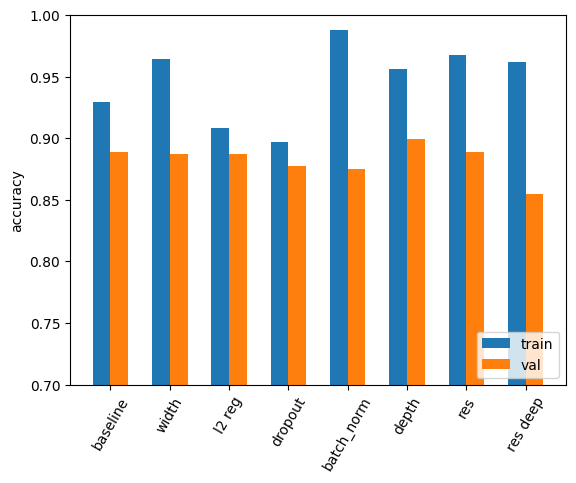

In [59]:
trn_acc = [v['train'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('accuracy_comparison.png', bbox_inches='tight')
plt.show()
